In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = '/Volumes/GoogleDrive/My Drive/data science/03_house_price_advanced_regression/data'
df_data = pd.read_csv(os.path.join(data, 'train.csv'))

In [4]:
df_data['MSSubClass'] = df_data['MSSubClass'].astype(str)

In [5]:
# identify numeric or categorical variables
num_cols = []
cat_cols = []
for col in df_data.columns:
    if df_data[col].dtypes in ['int64', 'float64']:
        if (col !='Id') & (col !='SalePrice'):
            num_cols.append(col)
    else:
        cat_cols.append(col)

In [72]:
# num_cols

Text(0.5, 1.0, 'SalePrice Distribution')

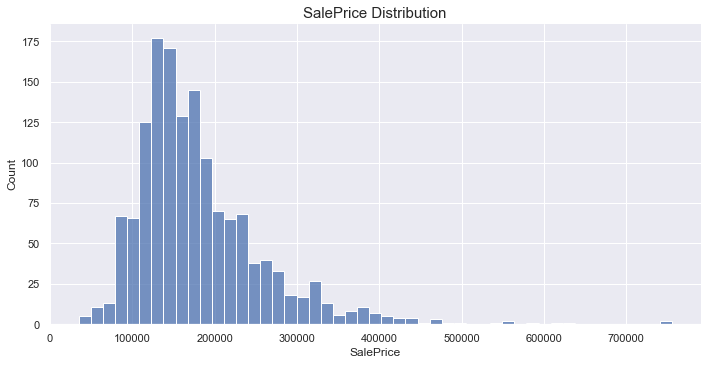

In [6]:
fig = sns.displot(data=df_data, x = 'SalePrice', kind='hist', height=5, aspect = 2)
plt.title(f'SalePrice Distribution', fontsize=15)
# not normal distribution, does it matter? 

In [7]:
df_data['log_SalePrice'] = np.log(df_data['SalePrice'])

In [76]:
# num_cols

In [25]:
# for col in num_cols:
#     sns.displot(data=df_data, x = col, kind='hist')

In [26]:
# exam the correlation with Sale Price
# for col in num_cols:
#     sns.relplot(data=df_data, x=col, y="SalePrice")

In [27]:
# exame the correlation with log_salePrice
# for col in num_cols:
#     sns.relplot(data=df_data, x=col, y="log_SalePrice")

In [28]:
# investigate categorical variables
# col = 'MSZoning'
# for col in cat_cols:
#     sns.catplot(data=df_data, x=col, y = 'log_SalePrice', kind ='box', aspect=2)

<AxesSubplot:>

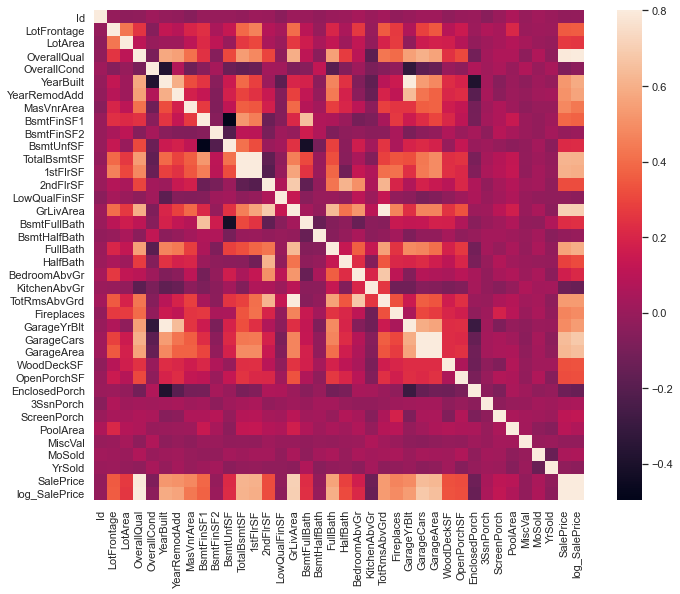

In [8]:
# correlation plot
corrmat = df_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [9]:
corrmat

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_SalePrice
Id,1.000000,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.017942
LotFrontage,-0.010601,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.355878
LotArea,-0.033226,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.257320
OverallQual,-0.028365,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.817184
OverallCond,0.012609,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.036868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-0.006242,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,0.004940,-0.023837,-0.018479,-0.021096,0.016197,-0.003793,-0.002416,-0.023047,-0.007367,-0.014290,0.001290,0.007767,0.062341,0.024763,0.001409,-0.032417,-0.043080,-0.027400,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190,-0.020021
MoSold,0.021172,0.011200,0.001205,0.070815,-0.003511,0.012398,0.021490,-0.005965,-0.015727,-0.015211,0.034888,0.013196,0.031372,0.035164,-0.022174,0.050240,-0.025361,0.032873,0.055872,-0.009050,0.046544,0.026589,0.036907,0.046357,0.005337,0.040522,0.027974,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432,0.057329
YrSold,0.000712,0.007450,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,0.014359,0.031706,-0.041258,-0.014969,-0.013604,-0.028700,-0.028921,-0.036526,0.067049,-0.046524,-0.019669,-0.010269,-0.036014,0.031687,-0.034516,-0.024096,-0.001014,-0.039117,-0.027378,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923,-0.037263
SalePrice,-0.021917,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.486362,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000,0.948374


<AxesSubplot:>

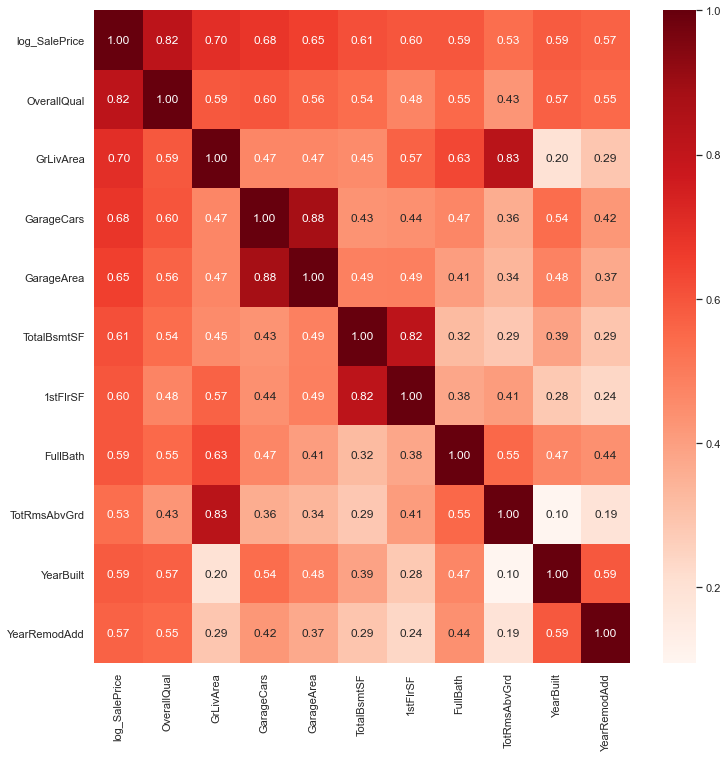

In [10]:
# corrmat
f, ax = plt.subplots(figsize=(12, 12))
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols = cols.drop("SalePrice") 
corrmat_selected = df_data[cols].corr()
sns.heatmap(corrmat_selected, annot=True, fmt='.2f', cmap = 'Reds')
# # hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

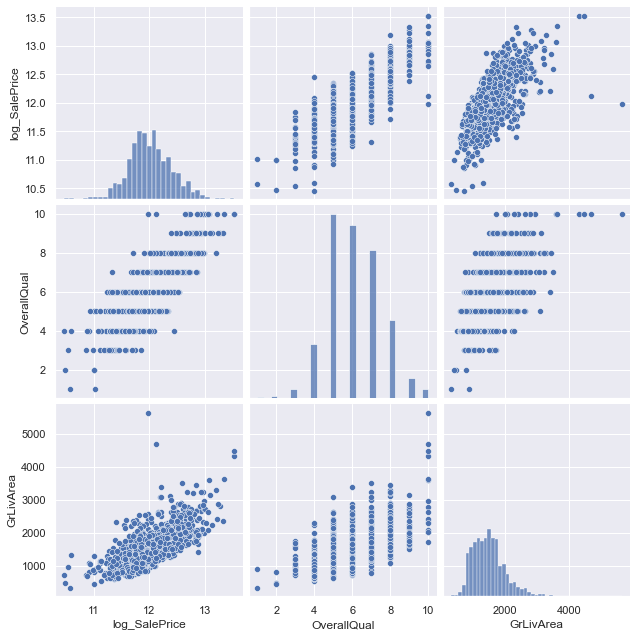

In [11]:
# this kind of graph is not really needed; 
sel_cols = ["log_SalePrice", "OverallQual", "GrLivArea"]
sns.pairplot(df_data[sel_cols], height = 3)
# plt.show();

In [12]:
def data_fill_rate(df):
    fill = df.notnull().sum()
    df_fill = fill.to_frame()
    df_fill.rename(columns = {0: 'filled'}, inplace=True)
    df_fill['total'] = df.shape[0]
    df_fill['fill_rate'] = df_fill['filled']/ df_fill['total']
    df_types = df.dtypes.to_frame('dtypes')
    df_fill = pd.merge(left=df_fill, right= df_types, left_index =True, right_index=True, how='outer')
    return df_fill

In [13]:
df_fill_rate= data_fill_rate(df_data)

In [84]:
# df_fill_rate.to_csv('df_fill_rate.csv')

In [14]:
df_fill_rate[df_fill_rate['fill_rate']<1].sort_values(by ='fill_rate', ascending=True)
# do not use columns which have below 80% fill rate 

,filled,total,fill_rate,dtypes
PoolQC,7,1460,0.004795,object
MiscFeature,54,1460,0.036986,object
Alley,91,1460,0.062329,object
Fence,281,1460,0.192466,object
FireplaceQu,770,1460,0.527397,object
LotFrontage,1201,1460,0.822603,float64
GarageType,1379,1460,0.944521,object
GarageYrBlt,1379,1460,0.944521,float64
GarageFinish,1379,1460,0.944521,object
GarageQual,1379,1460,0.944521,object


# variable transformation

In [15]:
# same logic should be applied to test data 

df_data['PoolQC'] = df_data['PoolQC'].fillna('No Pool')
df_data['MiscFeature'] = df_data['MiscFeature'].fillna('None')
df_data['Alley'] = df_data['Alley'].fillna('No Alley Access')
df_data['Fence'] = df_data['Fence'].fillna('No Fence')
df_data['FireplaceQu'] = df_data['FireplaceQu'].fillna('No Fireplace')
df_data['LotFrontage'] = df_data['LotFrontage'].fillna(df_data['LotFrontage'].mean()) # fill missing using average value

df_data['GarageType'] = df_data['GarageType'].fillna('No Garage')
df_data['GarageFinish'] = df_data['GarageType'].fillna('No Garage')
df_data['GarageQual'] = df_data['GarageQual'].fillna('No Garage')
df_data['GarageCond'] = df_data['GarageCond'].fillna('No Garage')
df_data.loc[df_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = df_data['YearBuilt'] # use year built as a proxy

# what to do with garageYrbLT?
df_data['BsmtExposure'] = df_data['BsmtExposure'].fillna('No Basement')
df_data['BsmtFinType2'] = df_data['BsmtFinType2'].fillna('No Basement')
df_data['BsmtFinType1'] = df_data['BsmtFinType1'].fillna('No Basement')
df_data['BsmtQual'] = df_data['BsmtQual'].fillna('No Basement')
df_data['BsmtCond'] = df_data['BsmtCond'].fillna('No Basement')

df_data['MasVnrType'] = df_data['MasVnrType'].fillna('None')
df_data['MasVnrArea'] = df_data['MasVnrArea'].fillna(0)


from sklearn.impute import SimpleImputer
imp_freq = SimpleImputer(strategy='most_frequent')
df_data['Electrical'] = imp_freq.fit_transform(df_data[['Electrical']])

# following code does not apply for this case

In [38]:
# the following code is good, but should not be used here 
# cat_cols_low_fill = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
# for col in cat_cols_low_fill:
#     sns.catplot(data=df_data, x=col, y = 'log_SalePrice', kind ='box', aspect=2)
    
# these values seem to have strong association with the log_SalePrice, do not want to drop them
# fill them with "missing"

In [39]:
# These code is no longer needed, because after reading the description, it should not be 
# cat_cols_high_fill = list(set(cat_cols) - set(cat_cols_low_fill))
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(strategy='mean')
# imp_freq = SimpleImputer(strategy='most_frequent')
# imp_const = SimpleImputer(strategy='constant', fill_value ='missing')
# df_data[cat_cols_high_fill] = imp_freq.fit_transform(df_data[cat_cols_high_fill])
# df_data[cat_cols_low_fill] = imp_const.fit_transform(df_data[cat_cols_low_fill])
# df_data[num_cols] = imp_mean.fit_transform(df_data[num_cols])

In [16]:
df_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,Attchd,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,Attchd,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,Attchd,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Detchd,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,Attchd,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,Attchd,2,460,TA,TA,Y,0,40,0,0,0,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000,12.072541
1456,1457,20,RL,85.0,13175,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Attchd,2,500,TA,TA,Y,349,0,0,0,0,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000,12.254863
1457,1458,70,RL,66.0,9042,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,G

# one hot encoding

In [16]:
df_data_1 = pd.get_dummies(df_data, columns = cat_cols, prefix = cat_cols, drop_first=False)

In [17]:
cat_encoding_cols = []
for col in df_data_1.columns:
    if df_data_1[col].dtypes =='uint8':
        cat_encoding_cols.append(col)

In [18]:
var_cols = num_cols + cat_encoding_cols
var_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_No Alley Access',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2'

In [44]:
# num_cols

In [19]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_data_1, test_size = 0.2, random_state=42)
X_train = df_train[var_cols]
y_train = df_train['log_SalePrice']

X_test = df_test[var_cols]
y_test = df_test['log_SalePrice']

In [20]:
df_train

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_SalePrice,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley Access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functio

# Modeling: Xgboost + Gridsearch

In [22]:
# also need to identify the evaluation function
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [36]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# param_grid = [{'colsample_bytree': [1,0.8,0.6, 0.5, 0.4],
#                'eta': [0.01, 0.05, 0.1],
#                'max_depth': [2,4,6,8],
#                'n_estimators': [30, 100, 300, 400, 500, 600, 700, 800, 900],
#                'subsample': [1, 0.8, 0.6, 0.5, 0.4],
#               }]
param_grid = [{'colsample_bytree': [0.6, 0.5, 0.4],
               'eta': [0.05, 0.1],
               'max_depth': [2,4,6],
               'n_estimators': [600, 700, 800],
               'subsample': [0.6],
              }]
# param_grid = [{'n_estimators': [100,30,300], 
#               'max_depth': [4],
#               'eta': [0.01],
#               'subsample': [0.8],
#               'colsample_bytree': [0.6]}]

model = xgb.XGBRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring = 'neg_root_mean_squared_error')
# instead of using cross validation, we should use 

In [37]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [39]:
grid_search.best_score_

-0.12336112695146459

In [40]:
grid_search.best_params_
# {'colsample_bytree': 0.6,
#  'eta': 0.05,
#  'max_depth': 4,
#  'n_estimators': 800,
#  'subsample': 0.6}

{'colsample_bytree': 0.6,
 'eta': 0.05,
 'max_depth': 4,
 'n_estimators': 800,
 'subsample': 0.6}

In [31]:
import joblib

models = '/Volumes/GoogleDrive/My Drive/data science/03_house_price_advanced_regression/models'
#save your model or results
# joblib.dump(grid_search, os.path.join(models, 'gs_xgboost.pkl'))
#load your model for further usage
model = joblib.load(os.path.join(models, 'gs_xgboost.pkl'))
# joblib.load("model_file_name.pkl")

In [32]:
# df_test['pred_log_SalePrice']=model.predict(df_test[var_cols])
df_test['pred_log_SalePrice']=grid_search.predict(df_test[var_cols])
df_test['pred_SalePrice'] = np.exp(df_test['pred_log_SalePrice'])

/Users/ryansun/opt/anaconda3/envs/analytics37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ryansun/opt/anaconda3/envs/analytics37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
ticks = np.arange(10,14, 0.5)
g = sns.relplot(x=df_test['log_SalePrice'], y = df_test['pred_log_SalePrice'], kind='scatter')
# g.set_xticks(xticks)
# g = sns.scatterplot(x=y_test, y = y_pred)
# g.set_xticks(ticks)
# g.set_yticks(ticks)
g.set_axis_labels("actual log sales price", "predicted log sales price")
g.axes.flat[0].set_xticks(ticks)
g.axes.flat[0].set_yticks(ticks)

KeyError: 'pred_log_SalePrice'

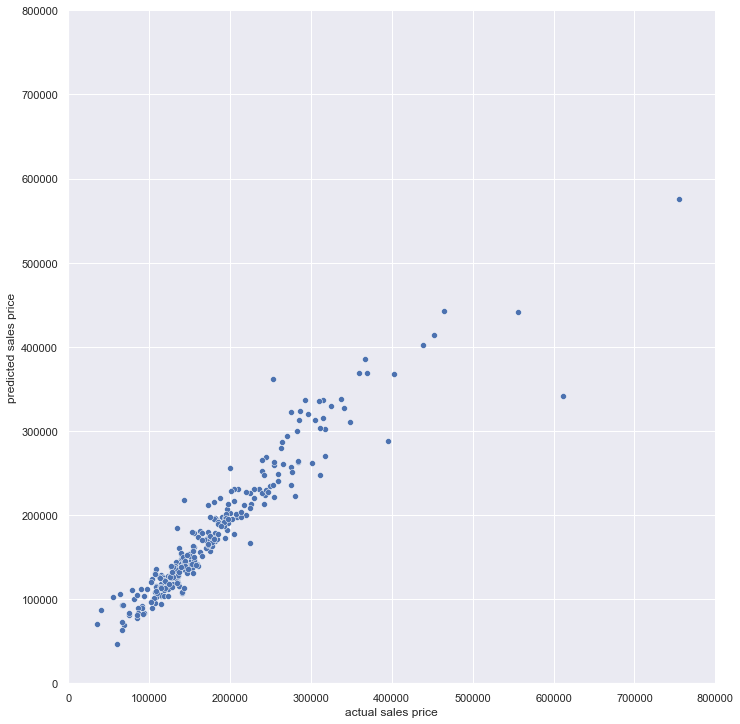

In [45]:
ticks = np.arange(0, 900000, 100000)
g = sns.relplot(x=df_test['SalePrice'], y = df_test['pred_SalePrice'], kind='scatter', height = 10)
g.set_axis_labels("actual sales price", "predicted sales price")
g.axes.flat[0].set_xticks(ticks)
g.axes.flat[0].set_yticks(ticks)

# Use LightGBM

In [101]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [102]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_data_1, test_size = 0.2, random_state=42)
X_train = df_train[var_cols]
y_train = df_train['log_SalePrice']
X_test = df_test[var_cols]
y_test = df_test['log_SalePrice']

In [103]:
# param_grid = [{'num_leaves': [30, 40, 50],
#                'learning_rate': [0.05, 0.1, 0.3],
#                'max_depth': [2,4,6],
#                'n_estimators': [150,200,250,300 ],
#               }]
param_grid = [{'num_leaves': [10, 15, 20, 25],
               'learning_rate': [0.1],
               'max_depth': [4],
               'n_estimators': [200, 250,280]}]
model = lgb.LGBMRegressor()
grid_search_lgb = GridSearchCV(model, param_grid, cv=5, scoring = 'neg_root_mean_squared_error')
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring = 'neg_root_mean_squared_error')

In [104]:
grid_search_lgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid=[{'learning_rate': [0.1], 'max_depth': [4],
                          'n_estimators': [200, 250, 280],
                          'num_leaves': [10, 15, 20, 25]}],
             scoring='neg_root_mean_squared_error')

In [60]:
grid_search_lgb.best_estimator_
grid_search_lgb.best_params_
grid_search_lgb.best_score_
df_test['pred_log_SalePrice']=grid_search_lgb.predict(df_test[var_cols])
df_test['pred_SalePrice'] = np.exp(df_test['pred_log_SalePrice'])
# models = '/Volumes/GoogleDrive/My Drive/data science/03_house_price_advanced_regression/models'
# save your model or results
# joblib.dump(grid_search_lgb, os.path.join(models, 'gs_lgb.pkl'))

['/Volumes/GoogleDrive/My Drive/data science/03_house_price_advanced_regression/models/gs_lgb.pkl']

In [113]:
lgb_model = lgb.LGBMRegressor(learning_rate=0.1, max_depth=4, n_estimators=280, num_leaves = 20)
lgb_model.fit(X_train, y_train)
df_test['pred_log_SalePrice']=lgb_model.predict(df_test[var_cols])
df_test['pred_SalePrice'] = np.exp(df_test['pred_log_SalePrice'])

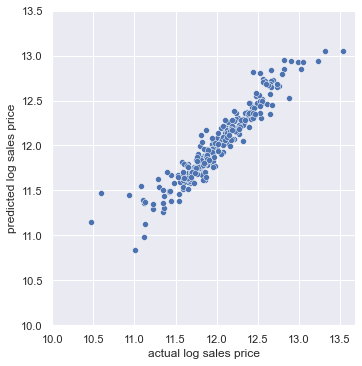

In [109]:
ticks = np.arange(10,14, 0.5)
g = sns.relplot(x=df_test['log_SalePrice'], y = df_test['pred_log_SalePrice'], kind='scatter')
# g.set_xticks(xticks)
# g = sns.scatterplot(x=y_test, y = y_pred)
# g.set_xticks(ticks)
# g.set_yticks(ticks)
g.set_axis_labels("actual log sales price", "predicted log sales price")
g.axes.flat[0].set_xticks(ticks)
g.axes.flat[0].set_yticks(ticks)

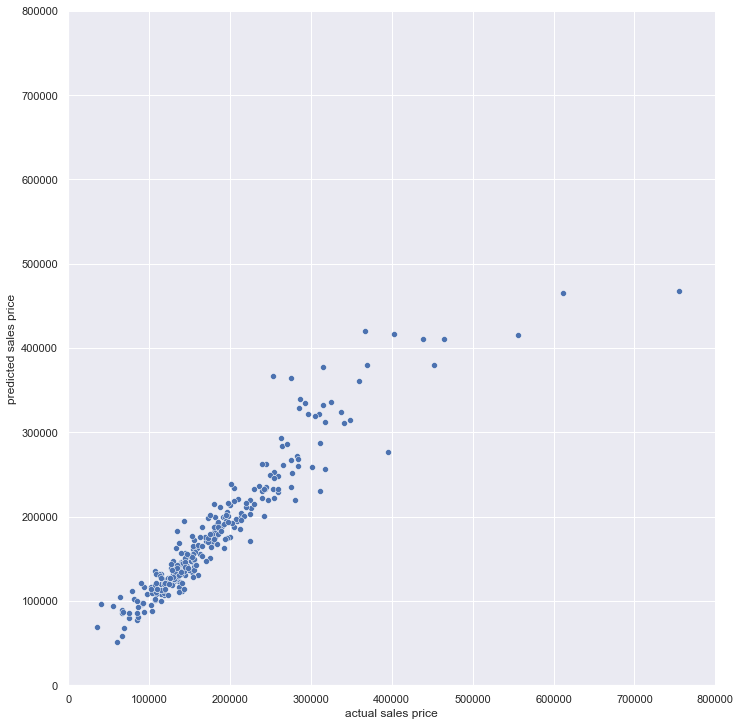

In [110]:
ticks = np.arange(0, 900000, 100000)
g = sns.relplot(x=df_test['SalePrice'], y = df_test['pred_SalePrice'], kind='scatter', height = 10)
g.set_axis_labels("actual sales price", "predicted sales price")
g.axes.flat[0].set_xticks(ticks)
g.axes.flat[0].set_yticks(ticks)

# Ridge / Lasso Regression

In [133]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()

In [135]:
df_data_2 = df_data_1.copy()
df_data_2[num_cols] = scaler.fit_transform(df_data_2[num_cols])

In [64]:
# X_train = df_data_2[var_cols]
# y_train = df_data_2['log_SalePrice']

In [136]:
# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(df_data_2, test_size = 0.2, random_state=42)
# X_train = df_train[var_cols]
# y_train = df_train['log_SalePrice']

# X_test = df_test[var_cols]
# y_test = df_test['log_SalePrice']

X_train = df_data_2[var_cols]
y_train = df_data_2['log_SalePrice']

In [137]:
df_data_2[num_cols]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.007405,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.019300,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.931353,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.817275,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.893327,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,0.250402,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.855301,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,1.061367,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,0.056753,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,1.569647,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,-1.350213,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,-0.832788,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-1.007978,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [157]:
# by default, the cv method is "LEAVE ONE OUT",
# specify the have cv=5
model = RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], 
                scoring = 'neg_root_mean_squared_error',
                cv = 5).fit(X_train, y_train)

# model = LassoCV(alphas=[1e-2, 1e-1, 1, 10, 100, 1000]).fit(X_train, y_train)
# >>> clf.score(X, y)

In [152]:
# only for Lasso; 
# from sklearn.model_selection import cross_val_score
# def rmse_cv(model):
#     rmse= -np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
#     return(rmse)
# rmse_cv(model).mean()

-0.15614115682070345

In [161]:
model.alpha_
model.best_score_
# model.alpha_

-0.13941321501179788

In [156]:
# model.best_score_

# best score from Ridge: -0.13941321501179788
# the best score from Lasso: -0.15614115682070345

In [159]:
model.score(X_test, y_test)

0.9325706344261325

In [160]:
model

RidgeCV(alphas=array([5.0e-02, 1.0e-01, 3.0e-01, 1.0e+00, 3.0e+00, 5.0e+00, 1.0e+01,
       1.5e+01, 3.0e+01, 5.0e+01, 7.5e+01]),
        cv=5, scoring='neg_root_mean_squared_error')

In [96]:
df_test['pred_log_SalePrice']=model.predict(df_test[var_cols])
df_test['pred_SalePrice'] = np.exp(df_test['pred_log_SalePrice'])

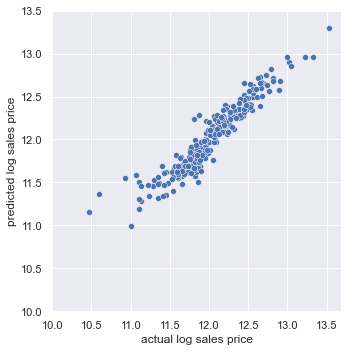

In [97]:
ticks = np.arange(10,14, 0.5)
g = sns.relplot(x=df_test['log_SalePrice'], y = df_test['pred_log_SalePrice'], kind='scatter')
g.set_axis_labels("actual log sales price", "predicted log sales price")
g.axes.flat[0].set_xticks(ticks)
g.axes.flat[0].set_yticks(ticks)

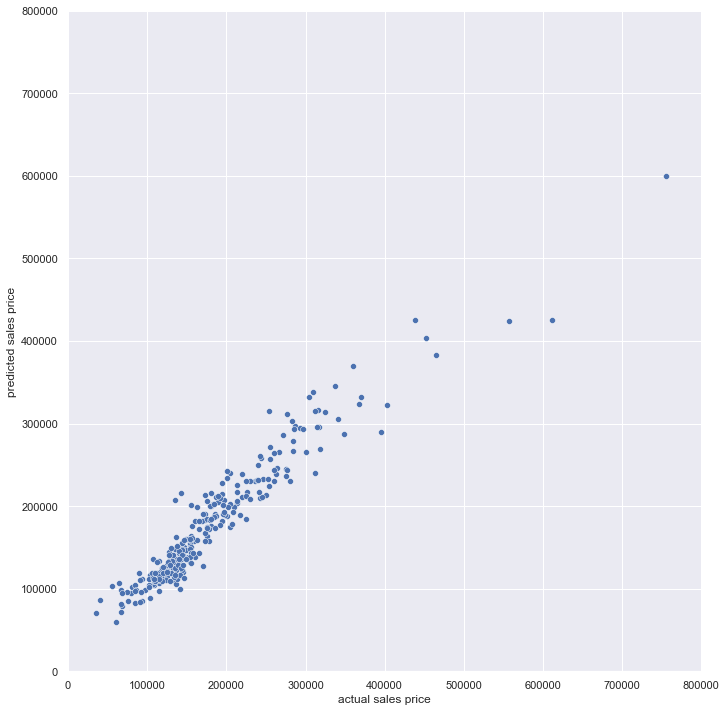

In [98]:
ticks = np.arange(0, 900000, 100000)
g = sns.relplot(x=df_test['SalePrice'], y = df_test['pred_SalePrice'], kind='scatter', height = 10)
g.set_axis_labels("actual sales price", "predicted sales price")
g.axes.flat[0].set_xticks(ticks)
g.axes.flat[0].set_yticks(ticks)

# Ridge / Lasso Regression from Kaggle Blogger 

In [66]:
df_data_2 = df_data_1.copy()
df_data_2[num_cols] = scaler.fit_transform(df_data_2[num_cols])

NameError: name 'scaler' is not defined

In [126]:
# df_train, df_test = train_test_split(df_data_2, test_size = 0.2, random_state=42)
# X_train = df_train[var_cols]
# y_train = df_train['log_SalePrice']

# X_test = df_test[var_cols]
# y_test = df_test['log_SalePrice']
X_train = df_data_2[var_cols]
y_train = df_data_2['log_SalePrice']

In [127]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

# This is using the cross validation
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [128]:
model_ridge = Ridge()

In [129]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

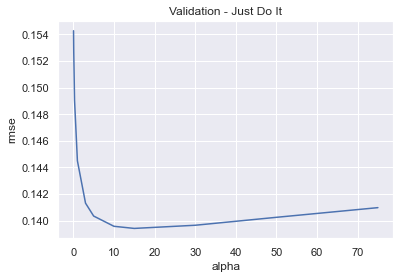

In [130]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")


In [150]:
cv_ridge

0.05     0.154273
0.10     0.152680
0.30     0.149028
1.00     0.144498
3.00     0.141313
5.00     0.140343
10.00    0.139573
15.00    0.139413
30.00    0.139651
50.00    0.140248
75.00    0.140975
dtype: float64

# This section uses a stack model
# how to fine tune it?

In [21]:
# from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

In [22]:
# xgboost best parameters
# {'colsample_bytree': 0.6,
#  'eta': 0.05,
#  'max_depth': 4,
#  'n_estimators': 800,
#  'subsample': 0.6}
# best score: -0.12336112695146459


# lgb best parameter
# {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 280, 'num_leaves': 20}
# best score: -0.12898386409287202

# xgb_model = xgb.XGBRegressor(colsample_bytree=0.6, eta=0.05, n_estimators = 800, max_depth=4, subsample=0.6, scoring = 'neg_root_mean_squared_error')
# lgb_model = lgb.LGBMRegressor(learning_rate=0.1, max_depth=4, n_estimators=280, num_leaves = 20, scoring = 'neg_root_mean_squared_error')

# setting the scoring function here does not matter, because it will not change how the model is built
xgb_model = xgb.XGBRegressor(colsample_bytree=0.6, eta=0.05, n_estimators = 800, max_depth=4, subsample=0.6)
lgb_model = lgb.LGBMRegressor(learning_rate=0.1, max_depth=4, n_estimators=280, num_leaves = 20)
final_estimator = RidgeCV()
# final_estimator = RandomForestRegressor(scoring='neg_root_mean_squared_error')
# model = xgb.XGBRegressor()
# estimators = []

In [23]:
xgb_model.fit(X_train, y_train).score(X_test, y_test)



0.9022271207383017

In [24]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eta=0.05, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0500000007, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
lgb_model.fit(X_train, y_train).score(X_test, y_test)

0.9005918384239407

In [26]:
estimators = [('xgb', xgb_model), ('lgb', lgb_model)]
# estimators = [xgb_model]

In [27]:
stack_model = StackingRegressor(estimators=estimators, cv = 'prefit')

In [28]:
stack_model.fit(X_train, y_train)
# lgb_model.fit(X_train, y_train)

ValueError: Expected cv as an integer, cross-validation object (from sklearn.model_selection) or an iterable. Got prefit.

In [50]:
y_test_stack_pred = stack_model.predict(X_test)
y_test_xgb_pred = xgb_model.predict(X_test)
y_test_lgb_pred = lgb_model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error

In [54]:
# after stacking, the mean square error did not become much better
print('stacking model score: ' +  str(- mean_squared_error(y_test_stack_pred, y_test, squared=False)))
print('xgb model score: ' +  str(- mean_squared_error(y_test_xgb_pred, y_test, squared=False)))
print('lgb model score: ' +  str(- mean_squared_error(y_test_lgb_pred, y_test, squared=False)))

stacking model score: -0.13194878879915045
xgb model score: -0.1350767966315909
lgb model score: -0.1362017135511283


In [60]:
stack_model.final_estimator

In [ ]:
reg.score(X_test, y_test)